In [44]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

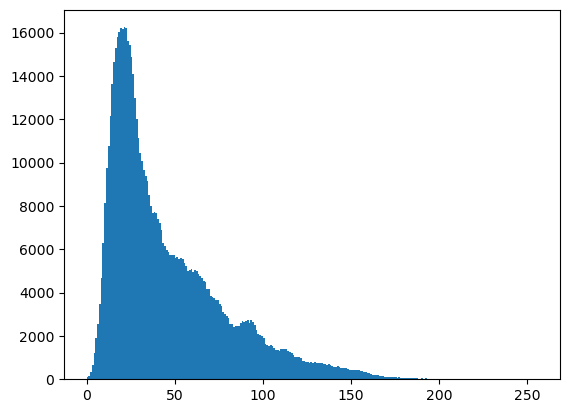

In [45]:
img = cv2.imread('sunset.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

In [46]:
img = cv2.imread('sunset.jpg')
color = ('b','g','r')


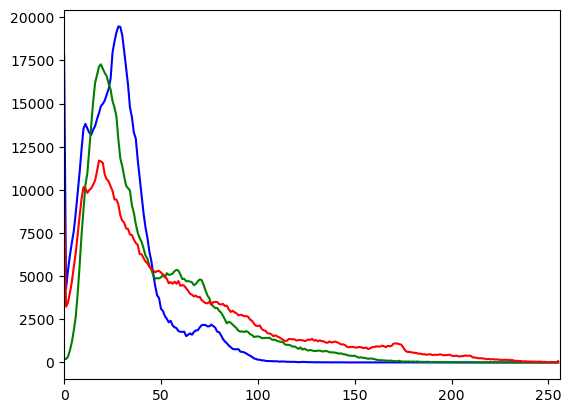

In [47]:
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [48]:
img = cv2.imread('sunset.jpg',0)

In [55]:
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:500, 100:500] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

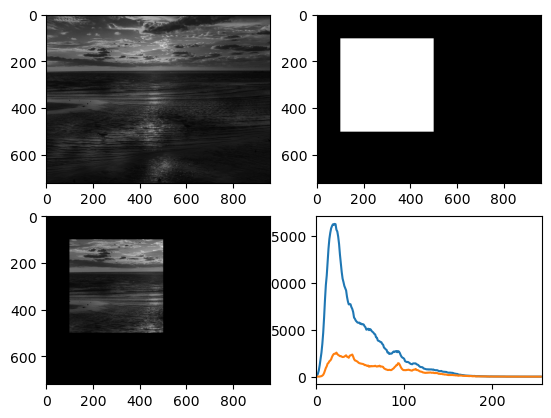

In [56]:
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()


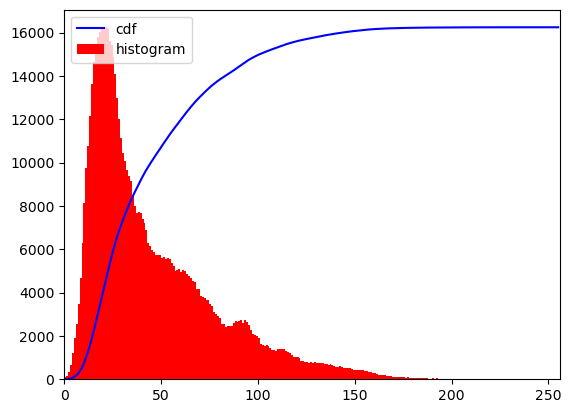

In [51]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [52]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [53]:
img2 = cdf[img]

In [54]:
img = cv2.imread('sunset.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)


True